<a href="https://colab.research.google.com/github/MILLERASPRILLA/Proyecto--Churn-/blob/main/Limpieza_exploracion/Regresi%C3%B3n_Logisitca_Tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

# __PROYECTO DE GRADO__

> ## ____ Implementación de modelos de aprendizaje de máquina para la prevención de la fuga de clientes en una empresa de telecomunicaciones.
>
>
> <br>
>
> ## __Contenido__

>**Tema:**

>> Regresión Logistica 

$$\ln \left(\frac{p_i}{1-p_i} \right)=\beta_0 +\beta_1X_1+\beta_2X_2+...+\beta_pX_p  $$ 
donde $p=P(Y=1)$

>---

- Librerias

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import class_likelihood_ratios
from sklearn import metrics

# EXTRACCIÓN DE LOS DATOS 

In [2]:
DF = pd.read_csv("https://raw.githubusercontent.com/MILLERASPRILLA/Proyecto--Churn-/main/Bases/Data_limpia%20(2).csv", sep= ",", encoding= "latin1")
DF.shape

(7043, 20)

In [3]:
DF.set_index("ID_CLIENTE", inplace = True)
DF.head()

,GENERO,ADULTO_MAYOR,CASADO,PERSONAS_A_CARGO,MESES_COMO_CLIENTE,TIENE_TELEFONIA,VARIAS_LINEAS,TIPO_INTERNET,SEGURIDAD_EN_LINEA,COPIA_DE_SEGURIDAD,PROTECCION_DISPOSITIVO,SOPORTE_TECNICO,SERVICIO_TV,SERVICIOS_STREAMING,PERIODO_CONTRATO,FACTURACION_ELECTRONICA,METODO_PAGO,COBRO_MENSUAL,ABANDONO
ID_CLIENTE,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


# Preprocesamiento

## EXPLORACIÓN

In [4]:
# Exploracion de las variables. 
DF.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GENERO                   7043 non-null   object 
 1   ADULTO_MAYOR             7043 non-null   int64  
 2   CASADO                   7043 non-null   object 
 3   PERSONAS_A_CARGO         7043 non-null   object 
 4   MESES_COMO_CLIENTE       7043 non-null   int64  
 5   TIENE_TELEFONIA          7043 non-null   object 
 6   VARIAS_LINEAS            7043 non-null   object 
 7   TIPO_INTERNET            7043 non-null   object 
 8   SEGURIDAD_EN_LINEA       7043 non-null   object 
 9   COPIA_DE_SEGURIDAD       7043 non-null   object 
 10  PROTECCION_DISPOSITIVO   7043 non-null   object 
 11  SOPORTE_TECNICO          7043 non-null   object 
 12  SERVICIO_TV              7043 non-null   object 
 13  SERVICIOS_STREAMING      7043 non-null   object 
 14  PERIODO_CONTRA

>> A pesar que en la limpieza de datos habíamos transformado las variables tipo objeto a tipo category, al cargar la base de datos Python las reconoce como objeto, por lo cual, reemplazaremos nuevamente el tipo de dato. 

In [5]:
# Convertir columnas en categorias
columnasConvertir = ['GENERO', 'ADULTO_MAYOR', 'CASADO', 'PERSONAS_A_CARGO', 'TIENE_TELEFONIA', 
               'VARIAS_LINEAS', 'TIPO_INTERNET', 'SEGURIDAD_EN_LINEA', 'COPIA_DE_SEGURIDAD', 
               'PROTECCION_DISPOSITIVO', 'SOPORTE_TECNICO', 'SERVICIO_TV', 'SERVICIOS_STREAMING', 
               'PERIODO_CONTRATO', 'FACTURACION_ELECTRONICA', 'METODO_PAGO', 'ABANDONO']
              
DF[columnasConvertir] = DF[columnasConvertir].astype("category")

In [6]:
# Reporte de cambios
DF.dtypes

GENERO                     category
ADULTO_MAYOR               category
CASADO                     category
PERSONAS_A_CARGO           category
MESES_COMO_CLIENTE            int64
TIENE_TELEFONIA            category
VARIAS_LINEAS              category
TIPO_INTERNET              category
SEGURIDAD_EN_LINEA         category
COPIA_DE_SEGURIDAD         category
PROTECCION_DISPOSITIVO     category
SOPORTE_TECNICO            category
SERVICIO_TV                category
SERVICIOS_STREAMING        category
PERIODO_CONTRATO           category
FACTURACION_ELECTRONICA    category
METODO_PAGO                category
COBRO_MENSUAL               float64
ABANDONO                   category
dtype: object

## ONE CODE

>> Toda vez que el modelo no recibe datos categóricos , codificaremos las variables categoricas en variables tipo one code

In [7]:
# Codificacion variables categoricas
DF_dummie = DF.select_dtypes(exclude=np.number)
DF_dummie = pd.get_dummies(DF_dummie, drop_first = True)
DF_dummie.head()

,GENERO_Male,ADULTO_MAYOR_1,CASADO_Yes,PERSONAS_A_CARGO_Yes,TIENE_TELEFONIA_Yes,VARIAS_LINEAS_No phone service,VARIAS_LINEAS_Yes,TIPO_INTERNET_Fiber optic,TIPO_INTERNET_No,SEGURIDAD_EN_LINEA_No internet service,...,SERVICIO_TV_Yes,SERVICIOS_STREAMING_No internet service,SERVICIOS_STREAMING_Yes,PERIODO_CONTRATO_One year,PERIODO_CONTRATO_Two year,FACTURACION_ELECTRONICA_Yes,METODO_PAGO_Credit card (automatic),METODO_PAGO_Electronic check,METODO_PAGO_Mailed check,ABANDONO_Yes
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5575-GNVDE,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3668-QPYBK,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
7795-CFOCW,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9237-HQITU,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


## Estandarización 

>> Toda vez que los datos cuantitativos en la base tienen escalas y unidades de medida diferentes consideramos necesario homogenizar estos datos para evitar introducir sesgos al modelo. 

>> Para esto homogenizaremos las variables usando la técnica de Robust Scaler que nos permitirá no solo ajustar nuestros datos a una distribución normal, si no que nos evitara que los datos atípicos sesguen los resultados de nuestro modelo.  

In [8]:
# Obtener variables numericas en otro data frame
DF_num = DF.select_dtypes(include=np.number)
# Estandarizar los datos numericos
datosEstandarizados = preprocessing.RobustScaler().fit_transform(DF_num)
# Crear dataframa con los datos estandarizados 
DF_num = pd.DataFrame(datosEstandarizados, columns = DF_num.columns, index = DF_num.index)
DF_num.head()

,MESES_COMO_CLIENTE,COBRO_MENSUAL
ID_CLIENTE,,
7590-VHVEG,-0.608696,-0.745170
5575-GNVDE,0.108696,-0.246550
3668-QPYBK,-0.586957,-0.303588
7795-CFOCW,0.347826,-0.516099
9237-HQITU,-0.586957,0.006440


## BASE FINAL

In [9]:
# concatenar los dataframe
DF_modelo =  pd.concat([DF_dummie, DF_num], axis=1)
DF_modelo.head() 

,GENERO_Male,ADULTO_MAYOR_1,CASADO_Yes,PERSONAS_A_CARGO_Yes,TIENE_TELEFONIA_Yes,VARIAS_LINEAS_No phone service,VARIAS_LINEAS_Yes,TIPO_INTERNET_Fiber optic,TIPO_INTERNET_No,SEGURIDAD_EN_LINEA_No internet service,...,SERVICIOS_STREAMING_Yes,PERIODO_CONTRATO_One year,PERIODO_CONTRATO_Two year,FACTURACION_ELECTRONICA_Yes,METODO_PAGO_Credit card (automatic),METODO_PAGO_Electronic check,METODO_PAGO_Mailed check,ABANDONO_Yes,MESES_COMO_CLIENTE,COBRO_MENSUAL
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,-0.608696,-0.745170
5575-GNVDE,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.108696,-0.246550
3668-QPYBK,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,-0.586957,-0.303588
7795-CFOCW,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0.347826,-0.516099
9237-HQITU,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,1,-0.586957,0.006440


# MODELADO

## Modelo 1  

In [10]:
# Partición de datos de entrenamiento y prueba 
Y=DF_modelo["ABANDONO_Yes"] ## Seleccionamos la variable objetivo (binaria)
X=DF_modelo.drop("ABANDONO_Yes", axis=1) ## Seleccionamos las variables explicativas
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123,test_size=0.3, stratify=Y) ## Dividimos en entrenamiento y prueba, y estratificando
##por la variable Y 
X_train.shape

(4930, 29)

In [11]:
#   Entrenando al modelo
logreg=LogisticRegression() ### Llamo la regresión logistica
logreg.fit(X_train, y_train) ## Entreno el modelo

LogisticRegression()

### Metricas modelo 

In [12]:
# prediccion del modelo 
y_pred_train=logreg.predict(X_train) ### Un umbral de 50%
y_pred_test=logreg.predict(X_test) ##  Un umbral de 50%

In [13]:
confusion_matrix = confusion_matrix(y_test, y_pred_test)

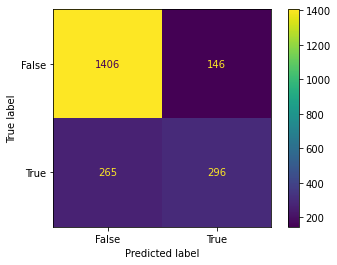

In [14]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [15]:
# Generando la prediccion y viendo sus metricas
y_pred_train=logreg.predict(X_train) ### Un umbral de 50%
y_pred_test=logreg.predict(X_test) ##  Un umbral de 50%
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      3622
           1       0.65      0.54      0.59      1308

    accuracy                           0.80      4930
   macro avg       0.75      0.72      0.73      4930
weighted avg       0.79      0.80      0.80      4930

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.67      0.53      0.59       561

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



>> Observamos que el modelo planteado clasifica bien el 81% de los datos en la prueba, sin embargo, tiene importantes dificultades para clasificar las personas que se irán de la compañía efectivamente.

>>Como lo observamos en la precisión del modelo solo el 67% de las personas que el modelo indico se iría de la compañía se fueron efectivamente. Por su parte, tan solo el 55% de las personas que el modelo sugiere no se irían de la compaña efectivamente se quedaron. 

>>Cabe recordar que el objetivo de este trabajo es predecir correctamente los clientes que se fugen, por lo que el RCALL nos sugiere que el modelo esta siendo poco efectivo en este sentido. 
